In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from datetime import date
from datetime import datetime

### Читаем спарсенный файл и сохраняем

In [5]:
df = pd.read_csv(r'C:\Users\79627\Desktop\КР\данные\tg_msg.csv', sep='|')

In [6]:
df['src'] = df['src'].str.replace('.json', '')

C:\Users\79627\AppData\Local\Temp/ipykernel_10488/3500464827.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['src'] = df['src'].str.replace('.json', '')


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.head()

,Unnamed: 0,date,message,src
0,1,2022-01-15 08:27:20+00:00,"Дело в том, что все сервисы мы делаем, прежде ...",01_dohod_invest_talks
1,2,2022-01-15 08:24:35+00:00,Не все изменения так интересны. Но в новой вер...,01_dohod_invest_talks
2,3,2022-01-15 07:17:53+00:00,Доброе утро. Почему у ДОХОДА нет прогнозов див...,01_dohod_invest_talks
3,5,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks
4,7,2022-01-14 13:18:13+00:00,ну я про то что как-то сообразили и на объемы ...,01_dohod_invest_talks


In [9]:
df.isna().sum()

Unnamed: 0        0
date              0
message       39103
src               0
dtype: int64

In [10]:
df = df[df['message'].notna()]

In [11]:
df = df[~df['src'].isin(['39_sveta_economy', '40_intrinsic_value', '41_moex_school'])]

In [12]:
df.groupby('src').message.count().sort_values(ascending=False)

src
02_AK47PFLCHAT                506604
19_markettwits                168466
05_invest_future_chat         118300
09_fintraining_link            94904
06_fondrynok                   79590
10_russianmacro2020            72832
08_if_stocks_chat              62512
03_cubishkachat                60476
04_cbrstockschat               34260
01_dohod_invest_talks          27380
18_banksta                     18659
23_headlines_for_traders       11799
24_russianmacro                10992
30_finamalert                  10649
17_bitkogan                    10429
21_AK47pfl                     10085
27_dohod                        9565
33_ProfitGate                   8508
07_gramotnye_investicii         6720
20_FatCat18                     5464
35_goodtraders                  5075
28_selfinvestor                 4481
11_moex                         4462
15_investfuture                 4267
29_trader_chernyh               3736
12_vtbmyinvestments             2796
34_MarketDumki                  21

<AxesSubplot:>

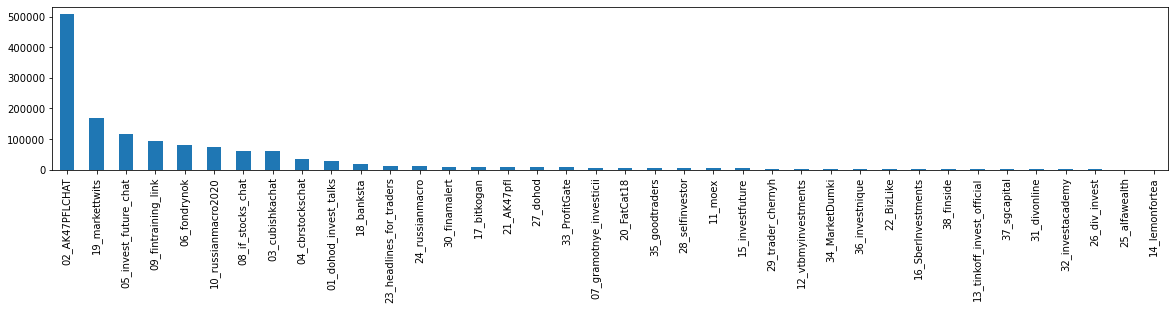

In [13]:
plt.rcParams["figure.figsize"] = (20,3)
df['src'].value_counts().plot(kind='bar')

In [14]:
df.src.unique()

array(['01_dohod_invest_talks', '02_AK47PFLCHAT', '03_cubishkachat',
       '04_cbrstockschat', '05_invest_future_chat', '06_fondrynok',
       '07_gramotnye_investicii', '08_if_stocks_chat',
       '09_fintraining_link', '10_russianmacro2020', '11_moex',
       '12_vtbmyinvestments', '13_tinkoff_invest_official',
       '14_lemonfortea', '15_investfuture', '16_SberInvestments',
       '17_bitkogan', '18_banksta', '19_markettwits', '20_FatCat18',
       '21_AK47pfl', '22_BizLike', '23_headlines_for_traders',
       '24_russianmacro', '25_alfawealth', '26_div_invest', '27_dohod',
       '28_selfinvestor', '29_trader_chernyh', '30_finamalert',
       '31_divonline', '32_investacademy', '33_ProfitGate',
       '34_MarketDumki', '35_goodtraders', '36_investnique',
       '37_sgcapital', '38_finside'], dtype=object)

In [15]:
df.loc[df['src'] == '01_dohod_invest_talks', 'type'] = 'chat'
df.loc[df['src'] == '02_AK47PFLCHAT', 'type'] = 'chat'
df.loc[df['src'] == '03_cubishkachat', 'type'] = 'chat'
df.loc[df['src'] == '04_cbrstockschat', 'type'] = 'chat'
df.loc[df['src'] == '05_invest_future_chat', 'type'] = 'chat'
df.loc[df['src'] == '06_fondrynok', 'type'] = 'chat'
df.loc[df['src'] == '07_gramotnye_investicii', 'type'] = 'chat'
df.loc[df['src'] == '08_if_stocks_chat', 'type'] = 'chat'
df.loc[df['src'] == '09_fintraining_link', 'type'] = 'chat'
df.loc[df['src'] == '10_russianmacro2020', 'type'] = 'chat'
df.loc[df['src'] == '11_moex', 'type'] = 'chat'

In [16]:
df.loc[df['type'] != 'chat', 'type'] = 'channel'

In [17]:
df.query('type == "channel"').src.unique()
for source in df.query('type == "channel"').src.unique():
    print(source)
    print(df[df['src'] == source].info())
    print(min(df[df['src'] == source].date))
    print(max(df[df['src'] == source].date))
    print(df[df['src'] == source].message.count())
    print(df[df['src'] == source].message.count() / (max(df[df['src'] == source].date)-min(df[df['src'] == source].date)).days)
    print()

12_vtbmyinvestments
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2796 entries, 1091950 to 1095358
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  2796 non-null   int64              
 1   date        2796 non-null   datetime64[ns, UTC]
 2   message     2796 non-null   object             
 3   src         2796 non-null   object             
 4   type        2796 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 131.1+ KB
None
2019-09-16 05:30:02+00:00
2022-01-17 08:14:39+00:00
2796
3.2740046838407495

13_tinkoff_invest_official
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 1095359 to 1097092
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  1621 non-null   int64              
 1   date        1621 non-null   da

10992
6.9393939393939394

25_alfawealth
<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 1351020 to 1351826
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  775 non-null    int64              
 1   date        775 non-null    datetime64[ns, UTC]
 2   message     775 non-null    object             
 3   src         775 non-null    object             
 4   type        775 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 36.3+ KB
None
2018-10-22 07:01:01+00:00
2022-01-11 16:04:18+00:00
775
0.6584536958368734

26_div_invest
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 1351827 to 1352883
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  1028 non-null   int64              
 1   date        1028 non-null 

2022-01-17 16:01:06+00:00
1460
0.8352402745995423

38_finside
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 1408026 to 1409869
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  1710 non-null   int64              
 1   date        1710 non-null   datetime64[ns, UTC]
 2   message     1710 non-null   object             
 3   src         1710 non-null   object             
 4   type        1710 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 80.2+ KB
None
2017-02-08 10:47:45+00:00
2022-01-14 12:42:00+00:00
1710
0.9494725152692949



In [18]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,date,message,src,type
0,2022-01-15 08:27:20+00:00,"Дело в том, что все сервисы мы делаем, прежде ...",01_dohod_invest_talks,chat
1,2022-01-15 08:24:35+00:00,Не все изменения так интересны. Но в новой вер...,01_dohod_invest_talks,chat
2,2022-01-15 07:17:53+00:00,Доброе утро. Почему у ДОХОДА нет прогнозов див...,01_dohod_invest_talks,chat
3,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat
4,2022-01-14 13:18:13+00:00,ну я про то что как-то сообразили и на объемы ...,01_dohod_invest_talks,chat


In [ ]:
df.to_csv('read_tg_msg.csv')

### Обработка сообщений

In [ ]:
df = pd.read_csv(r'C:\Users\79627\Desktop\КР\данные\read_tg_msg.csv', usecols=[1,2,3,4])
df.head()

In [ ]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

In [ ]:
df['msg_lower'] = df.message.str.lower()
df.head()

In [ ]:
df = df.replace('\n',' ', regex=True)
df.head()

In [ ]:
df['msg_lower'] = df['msg_lower'].str.replace('ё', 'е')

In [ ]:
print(df.shape)
df.drop_duplicates('msg_lower', inplace=True)
print(df.shape)

In [ ]:
df.src.unique()

In [ ]:
#df = df.query('src=="13_tinkoff_invest_official"')

### Ищем упоминания о тикерах

In [ ]:
from tqdm import tqdm_notebook as tqdm

#### Минимум 100 упоминаний

In [1]:
tickers = {'acko': ['acko', 'ru000a0jxs91', ' аско'], 
           'ingr': ['ingr', 'инград', 'ru000a0dj9b4'], 
           'gazp': ['gazp', 'ogzd', 'газпром', 'миллер', 'газик', 'северный поток', 'южный поток', 'сила сибири', \
                    'ru0007661625'], 
           'sber': ['sber', 'сбер', 'греф', 'ru0009029540', 'rambler', 'рамблер', '2gis', '2гис', 'мегамаркет', \
                    'derways', 'дервейс','тройка диалог', 'ситимобил', 'delivery', 'кухня на районе', 'самокат', \
                    'ситидрайв', 'еаптека'], 
           'vtbr': ['vtb', 'костин', 'втб', 'внешторгбанк', 'народное ipo', 'ru000a0jp5v6'], 
           'rosn': ['rosn', 'роснефт', 'сечин', 'ru000a0j2q06', 'шредер'], 
           'gmkn': ['gmkn', 'mnod', 'норникел', 'nornickel', 'потанин', ' гмк ', ' норк', 'интеррос', 'гамак', \
                    'ru0007288411', 'nordstar', 'нордавиа', 'гипроникель'], 
           'moex': ['московская биржа', 'мосбирж', 'moex', 'москухн', 'ru000a0jr4a1', 'ммвб'], 
           'alrs': [' алрос', 'alrosa', 'alrs', 'алмаз', 'бриллиант', 'нюрб', 'ru0007252813'], 
           'lkoh': ['lkoh', 'luk', 'lkod', 'алекперов', 'лукойл', 'лучок', ' лучк', 'ru0009024277', 'teboil', \
                    'тевлинск', 'ватьеганск'], 
           'sngs': ['сургут', 'sngs', 'sggd', 'талакан', 'быстринск', 'кириши', 'лянтор', 'surgutneftega', \
                    'кубышка', 'сурик', 'снгс', 'ru0008926258'], 
           'tatn': ['татнефт', 'tatneft', 'tatn', 'atad', 'маганов', 'ru0009033591', 'альметьев', 'ромашкинск', \
                    'танеко'], 'yndx': ['yndx', 'yandex', 'яндекс', 'волож'], 
           'aflt': ['аэрофлот', 'aflt', 'добролет', 'аврор', 'российские авиалинии', 'полубояринов', 'aeroflot', \
                    'pobeda', 'ru0009062285'], 
           'magn': ['ммк', 'magn', 'магнитк', 'магнитогорск', 'магна', 'mmk', 'ru0009084396', 'рашников'], 
           'mtss': ['mts', ' мтс ', 'mbt', 'ru0007775219', 'мобильные телесистемы'], 
           'nvtk': ['nvtk', 'новатэк', 'нова тэк', 'novatek', 'ямал спг', 'михельсон', 'арктик спг', 'ru000a0dkvs5'], 
           'nlmk': ['нлмк', 'nlmk', 'липецк', 'лисин', 'ru0009046452', 'новолипецк', 'стинол'], 
           'chmf': ['северстал', 'chmf', 'severstal', 'череповец', 'мордашов', 
                    'svst', 'ижорск', 'ru0009046510'], 
           'mgnt': ['mgnt', 'магнит', 'magnit', 'марафон групп', 'галицк', 'тандер', 'ru000a0jkqu8', 'marathon group', \
                    'дюннингдикси'], 
           'plzl': ['plzl', 'polyus', 'полюс', 'polyusgold', 'сухой лог', 'месторождение олимпиада'], 
           'qiwi': ['qiwi', 'киви'], 'rasp': ['rasp', 'распад', 'южкузбас', 'сибугле'], 
           'lsrg': [' лср ', 'lsr', 'элэсэр', 'ru000a0jpfp0'], 
           'mtlr': ['мечел', 'mtl', 'mechel', 'ru000a0jpv70', 'зюзин'], 
           'phor': ['фосагр', 'phor', 'phosagr', 'фосфат', 'dap', 'апатит', 'ru000a0jrkt8'], 
           'rtkm': ['rtkm', 'rostelecom', 'ростел', 'tele2', ' ртк ', ' рткм ', 'осеевский', 'rkmd', 'rosyy', \
                    'ru0008943394', 'теле2', 'связьинвест'], 
           'hydr': ['русгидр', 'hydr', 'rushydr', 'гидра', 'ru000a0jpkh7'], 
           'afks': [' афк ', 'afks', 'afk sistem', 'евтушенков', 'афк систем', 'ssa', 'ru000a0dqze3', 'медси', \
                    'cosmos hotel', 'гостиница космос'], 
           'trmk': [' тмк ', 'трубная', 'trmk', 'tmk', 'трмк', 'ru000a0b6nk6'], 
           'upro': ['юнипро', 'upro', 'unip', 'эон россия', 'березовская грэс', 'сургутская грэс', 'ru000a0jnga5'], 
           'akrn': ['акрон', 'akrn', 'akron', 'азотные удобрения', 'ru0009028674', 'агронова'], 
           'pikk': [' пик ', 'pik', 'мортон', 'гордеев', 'ru000a0jp7j7'], 
           'lnta': [' лент', 'lent', 'lnta', 'tpg capital'], 
           'msng': ['мосэнерг', 'msng', 'mosenerg', 'мося', 'ru0008958863'], 
           'rual': ['русал', 'rusal', 'rual', 'русский алюминий', ' краз ', 'ru000a1025v3', 'тайшет'], 
           'trnf': ['транснефт', 'trnf', 'нефтепровод дружба', 'transneft', 'ru0009091573'], 
           'sibn': ['газпромнефт', 'sibn', 'gazpromneft', 'sibneft', 'сибнефт', 'газнефт', 'дюков', 'ноябрьск', \
                    'мессоях', 'приразлом'], 
           'nmtp': ['нмтп', 'nmtp', 'новороссийск', 'новопорт', 'ncsp', 'порт приморск', 'порт балтийск'], 
           'tanl': ['tanl', 'tantal', ' тант'], 
           'iskj': ['искч', 'институт стволовых клеток', 'стволовые клетки', 'стволовых клеток', 'iskj', 'ru000a0jnab6'], 
           'gche': ['черкизов', 'cherkizov', 'gche', 'cherk', 'ru000a0jl4r1'], 
           'svav': ['соллерс', 'svav', 'sollers', 'северстальавт', 'уаз', 'ru0006914488'], 
           'arsa': ['арсагер', 'ук арса', 'arsa', 'arsager', 'ru000a0jp0q7'], 
           'selg': ['селигдар', 'seligdar', 'selg', 'ru000a0jpr50'], 
           'nknc': ['nknc', 'нижнекамск', 'нкнх', 'нефтехим', 'ru0009100507', 'nknh', 'этилен-600'], 
           'irkt': ['иркут', 'irkt', 'сухой', 'суперджет', 'sukhoi', 'ssj', 'ru0006752979', 'мс-21'], 
           'lsng': ['ленэнерг', 'lsng', 'ленк', 'петербургские электросети', 'ru0009034490'], 
           'rlmn': [' ролл', 'ролман', 'rlmn', 'роля', 'ru000a0jtap3'], 
           'obuv': ['обувь росси', 'obuv', 'westfalika', 'обувьрус', 'orup'], 
           'agro': [' agro ', 'русагро', 'us7496552057'], 
           'bane': ['башнефт', 'bane', 'bashneft', 'ru0007976957', 'уфанефтехим'], 
           'belu': ['белуг', 'belu', 'belug', 'ru000a0hl5m1'], 
           'cntl': ['телеграф', 'cntl', 'telegraf', 'ru0007665147'], 
           'dsky': ['dsky', 'detskiy mir', 'детский', 'ru000a0jsq90', 'detmir'], 
           'enru': ['энелрос', 'enru', 'enel', ' энел ', 'ru000a0f5un3'], 
           'etln': ['etln', 'etalon', 'эталон', 'us29760g1031'], 
           'five': ['five', 'x5', 'пятерочк', 'шехтерман', 'перекрест', 'карусел', 'us98387e2054'], 
           'flot': ['совкомфлот', 'flot', 'sovcomflot', 'современный коммерческий флот', 'ru000a0jxnu8', \
                    'скф арктика', 'новошип'], 'gltr': ['gltr', 'глобалтранс', 'globaltrans', 'us37949e2046'], 
           'irao': ['irao', 'inter rao', 'борис ковальчук', 'ru000a0jpnm1', ' рао ', 'интер рао'], 
           'kmaz': [' камаз', 'kmaz', 'kamaz', 'ru0008959580'], 
           'krot': ['красокт', 'krot', 'крот', 'krasnyj octyabr', 'красный октябрь', 'krasny oktyabr', 'ru0008913850'], 
           'ksgr': [' кокс', 'ksgr', 'koks', 'ru000a0ernt3'], 
           'kzos': ['органический синтез', 'kzos', 'оргсинтез', 'organicheskiy sintez', 'ru0009089825'], 
           'life': ['фармсинтез', 'life', 'pharmsynt', 'ru000a0jr514'], 
           'mail': ['mail', 'mail.ru', 'мэйл.ру', 'мэйл ру', 'добродеев', 'us5603172082'], 
           'mstt': ['мостотрест', 'mstt', 'mostotrest', 'ru0009177331'], 
           'mvid': ['мвидео', 'mvid', 'м.видео', 'м видео', 'эльдорадо', 'изосимов', 'гуцериев', 'ru000a0jpga0'], 
           'npof': ['физик', 'npof', 'fizik', 'ru000a0jq5x1'], 
           'paza': ['павлавт', 'paza', 'pavlovo', 'павловский авт', 'pavlovskiy avt', 'паз', 'ru0009083240'], 
           'prtk': ['протек', 'prtk', 'protek', 'ru000a0jqu47'], 
           'rbcm': [' рбк ', 'rbcm', 'rbk', 'rbc', 'ru000a0jr6a6'], 
           'rsti': ['россет', 'rsti', 'российские сети', 'ru000a0jpvj0'], 
           'smlt': ['самолет', 'smlt', 'samolet', 'ru000a0zzg02'], 
           'tcsg': ['tcs', 'tinkof', 'тисиэс', 'тинек', 'тинько', 'us87238u2033'], 
           'tgkb': ['тгк 2', 'тгк-2', 'тгк2', 'tgkb', 'tgc-2', 'tgc2', 'tgc 2', 'ru000a0jngs7'], 
           'tgkd': ['квадр', 'tgkd', 'quadra', 'ru000a0jnmz0'], 
           'tors': [' трк ', 'tors', 'tomsk distribution', 'томская распред', 'ru000a0etzf2'], 
           'trfm': ['трансф', 'trfm', 'transfin', 'трансфин', 'ru000a0jugp8'], 
           'unac': ['авиасткао', 'unac', 'united aircraft', 'объединенная авиа', 'ru000a0jplz7', 'оак'], 
           'usbn': ['уралсиб', 'usbn', 'uralsib', 'урсиб', 'ru0006929536']}

In [2]:
tickers = {
'idvp' : ['idvp', ' идвп ', 'Инвест-Девелопмент', 'Инвест Девелопмент', 'RU000A0JV7V4'],
'odva' : ['odva', 'Медиахолдинг', 'Mediaholding', 'RU000A0JPWV3'],
'msst' : ['msst', 'Мультисистема', 'multisistem', 'RU000A0JTFH9'],
'grnt' : ['grnt', 'Городские Инновационные Технологии', ' ГИТ ', 'RU000A0JV532'],
'sibg' : ['sibg', 'Sibirskiy Gostinets', 'Сибирский гостинец', 'RU000A0JVA36'],
'rost' : ['Росинтер', 'Ростик', 'rosinter', 'RU000A0JP922'],
'lvhk' : ['lvhk', 'Левенгук', 'RU000A0JT7Y2', 'Levenguk'],
'acko' : ['acko', 'RU000A0JXS91', ' Аско'],
'merf' : ['merf', 'меридиан', 'RU000A0JQ128'],
'omzzp' : ['omz', 'RU0009090559', 'Уралмаш-Ижор', ' омз '],
'ingr' : ['ingr', 'Инград', 'RU000A0DJ9B4'],
'reni' : ['reni', 'Ренессанс страхование', 'RU000A0ZZM04'],
'sgzh' : ['sgzh', 'Segezha', 'Сегежа', 'RU000A102XG9', 'ЛесИнвест', 'Форест Рус', 'Шамолин'],
'gazp' : ['gazp', 'ogzd', 'газпром', 'миллер', 'газик', 'северный поток', 'южный поток', 'сила сибири', \
          'ru0007661625'],
'sber' : ['sber', 'сбер', 'греф', 'ru0009029540', 'rambler', 'рамблер', '2gis', '2гис', 'мегамаркет', 'derways', 'дервейс' \
         'тройка диалог', 'ситимобил', 'delivery', 'кухня на районе', 'самокат', 'ситидрайв', 'еаптека'],
'vtbr' : ['vtb', 'костин', 'втб', 'внешторгбанк', 'народное ipo', 'ru000A0JP5V6'],
'rosn':  ['rosn', 'роснефт', 'сечин', 'ru000a0j2q06', 'шредер'],
'gmkn':  ['gmkn', 'mnod', 'норникел', 'nornickel', 'потанин', ' гмк ', ' норк', 'интеррос', 'гамак', 'ru0007288411', \
          'nordstar', 'нордавиа', 'гипроникель'],
'moex':  ['московская биржа', 'мосбирж', 'moex', 'москухн', 'ru000a0jr4a1', 'ммвб'],
'alrs':  [' алрос', 'alrosa', 'alrs', 'алмаз', 'бриллиант', 'нюрб', 'ru0007252813'],
'lkoh':  ['lkoh', 'luk', 'lkod', 'алекперов', 'лукойл', 'лучок', ' лучк', 'ru0009024277', 'teboil', 'тевлинск', 'ватьеганск'],
'sngs':  ['сургут', 'sngs', 'sggd', 'талакан', 'быстринск', 'кириши',  'лянтор', 'surgutneftega', 'кубышка', 'сурик', 'снгс', \
          'ru0008926258'],
'tatn':  ['татнефт', 'tatneft', 'tatn', 'atad', 'маганов', 'ru0009033591', 'альметьев', 'ромашкинск', 'танеко'],
'yndx':  ['yndx', 'yandex', 'яндекс', 'волож'],
'aflt':  ['аэрофлот', 'aflt', 'добролет', 'аврор', 'российские авиалинии', 'полубояринов', 'aeroflot', 'pobeda', \
         'RU0009062285'],
'fees':  ['фск еэс', 'fees', 'феес', 'федеральные электросети', 'феск', 'RU000A0JPNN9'],
'magn':  ['ммк', 'magn', 'магнитк', 'магнитогорск', 'магна', 'mmk', 'RU0009084396', 'рашников'],
'mtss':  ['mts', ' мтс ', 'mbt', 'RU0007775219', 'Мобильные ТелеСистемы'],
'nvtk':  ['nvtk', 'новатэк', 'нова тэк', 'novatek', 'ямал спг', 'михельсон', 'арктик спг', 'ru000a0dkvs5'],
'nlmk':  ['нлмк', 'nlmk', 'липецк', 'лисин', 'ru0009046452', 'новолипецк', 'стинол'],
'chmf':  ['северстал', 'chmf', 'severstal', 'череповец', 'мордашов', 'svst', 'ижорск', 'ru0009046510'],
'mgnt':  ['mgnt', 'магнит', 'magnit', 'марафон групп', 'галицк', 'тандер', 'RU000A0JKQU8', 'Marathon Group', 'дюннинг' \
         'дикси'],
'plzl':  ['plzl', 'polyus', 'полюс', 'polyusgold', 'сухой лог', 'месторождение олимпиада'],
'qiwi':  ['qiwi', 'киви'],
'rasp':  ['rasp', 'распад', 'Южкузбас', 'Сибугле'],
'lsrg':  [' лср ', 'lsr', 'элэсэр', 'RU000A0JPFP0'],
'mtlr':  ['мечел', 'mtl', 'mechel', 'ru000a0jpv70', 'зюзин'],
'chmk':  ['chmk', 'ЧМК', 'ЧМЗ', 'Челябинский металлургическ', 'RU0007665170'],
'phor':  ['фосагр', 'phor', 'phosagr', 'фосфат', 'dap', 'апатит', 'RU000A0JRKT8'],
'rtkm':  ['rtkm', 'rostelecom', 'ростел', 'tele2', ' ртк ', ' рткм ', 'осеевский', 'rkmd', 'rosyy', 'RU0008943394', 'теле2', \
         'Связьинвест'],
'hydr':  ['русгидр', 'hydr', 'rushydr', 'гидра', 'ru000a0jpkh7'],
'afks':  [' афк ', 'afks', 'afk sistem', 'евтушенков', 'систем', 'ssa', 'RU000A0DQZE3', 'медси', 'Cosmos Hotel', \
          'гостиница космос'],
'trmk':  [' тмк ', 'трубная', 'trmk', 'tmk', 'трмк', 'RU000A0B6NK6'],
'upro':  ['юнипро', 'upro', 'unip', 'эон россия', 'березовская грэс', 'Сургутская ГРЭС', 'RU000A0JNGA5'],
'akrn':  ['акрон', 'akrn', 'akron', 'азотные удобрения', 'RU0009028674', 'Агронова'],
'pikk':  [' пик ', 'pik', 'мортон', 'гордеев', 'RU000A0JP7J7'],
'lnta':  [' лент', 'lent', 'lnta', 'tpg capital'],
'msng':  ['мосэнерг', 'msng', 'mosenerg', 'мося', 'RU0008958863'],
'tgka':  ['тгк1', 'тгк-1', 'тгк 1', 'tgka', 'tgk-1', 'tgk1', 'tgk 1', 'RU000A0JNUD0'],
'rual':  ['русал', 'rusal', 'rual', 'русский алюминий', ' краз ', 'ru000a1025v3', 'тайшет'],
'trnf':  ['транснефт', 'trnf', 'нефтепровод дружба', 'transneft', 'RU0009091573'],
'sibn':  ['газпромнефт', 'sibn', 'gazpromneft', 'sibneft', 'сибнефт', 'газнефт', 'дюков', 'ноябрьск', 'мессоях', \
          'приразлом'],
'nmtp':  ['нмтп', 'nmtp', 'новороссийск', 'новопорт', 'ncsp', 'Порт Приморск', 'Порт Балтийск'],
'tanl':  ['tanl', 'tantal', ' тант'],
'iskj':  ['искч', 'институт стволовых клеток', 'стволовые клетки', 'стволовых клеток', 'iskj', 'RU000A0JNAB6'],
'yakg':  ['ятэк', 'yakg', 'yakutsk fue', 'якутская топл', 'ru0007796819', 'Якутгазпром'],
'gtlc':  ['gtl', 'джитиэл', ' гтл ', 'RU000A0JTN19'],
'gche':  ['черкизов', 'cherkizov', 'gche', 'cherk', 'RU000A0JL4R1'],
'rolo':  ['русолов', 'rolo', 'rusolov', 'ролово', 'RU000A0JU1B0'],
'svav':  ['соллерс', 'svav', 'sollers', 'северстальавт', 'уаз', 'RU0006914488'],
'arsa':  ['арсагер', 'ук арса', 'arsa', 'arsager', 'RU000A0JP0Q7'],
'krkn':  ['саратовский нпз', 'снпз', 'krkn', 'сарнпз', 'RU0009100408'],
'selg':  ['селигдар', 'seligdar', 'selg', 'RU000A0JPR50'],
'prfn':  ['чзпсн', 'профнастил', 'настил', 'prfn', 'RU000A0JNXF9'],
'gaza':  ['gaza', 'газ завод', 'газ авто', 'газель', 'горьковский', 'RU0009034268'],
'kbtk':  ['kbtk', 'кбтк', 'кузбас', 'даэния холдинг'],
'nknc':  ['nknc', 'нижнекамск', 'нкнх', 'нефтехим', 'RU0009100507', 'nknh', 'Этилен-600'],
'aptk':  ['aptk', '36 и 6', '36.6', '36,6', 'RU0008081765', '36и6'],
'amez':  ['amez', 'ашинский', ' аша ', 'amet', ' амез', ' амет', 'RU000A0B88G6'],
'dasb':  ['dasb', 'Дагеста', 'RU000A0F63G0'],
'irkt':  ['иркут', 'irkt', 'сухой', 'суперджет', 'sukhoi', 'ssj', 'ru0006752979', 'мс-21'],
'lsng':  ['ленэнерг', 'lsng', 'ленк', 'петербургские электросети', 'RU0009034490'],
'rlmn':  [' ролл', 'ролман', 'rlmn', 'роля', 'RU000A0JTAP3'],
'obuv':  ['обувь росси', 'obuv', 'westfalika', 'обувьрус', 'ORUP'],
'abrd':  ['абрау', 'дюрсо', 'abrd', 'abrau', 'durso', 'русский винный дом', 'борис титов', 'ru000a0js5t7'],
'agro':  [' agro ', 'русагро', 'us7496552057'],
'albk':  ['бест эффортс', 'albk', 'best efforts', 'алор банкбестэфб', 'ru000a0js2m9'],
'alnu':  ['alnu', 'nyurba', 'алроса-нюрба', 'якуталмаз', 'ru000a0jp468'],
'aqua':  ['аквакультура', 'aqua', 'aquacultur', 'русаква', 'русское море', 'ru000a0jqts3'],
'assb':  ['астрэнсб', 'assb', 'astrakhan', 'аэск', 'астраханэнергосбыт', 'ru000a0d8mm8'],
'avan':  ['avangard', 'авангард', 'ru000a0dm7b3', 'миновалов'],
'bane':  ['башнефт', 'bane', 'bashneft', 'ru0007976957', 'Уфанефтехим'],
'belu':  ['белуг', 'belu', 'belug', 'ru000a0hl5m1'],
'bisv':  ['bisv', 'bashinformsvyaz', 'bashtel', 'ru0009059216'],
'blng':  [' белон', 'blng', 'belon', 'ru000a0j2qg8'],
'brzl':  ['бурзолот', 'brzl', 'buryatzolot', 'бурятзолот', 'ru0009288658'],
'bspb':  [' бсп ', 'bspb', 'bank st petersburg', 'банк санкт', 'ленбанк', 'ru0009100945'],
'cbom':  [' мкб ', 'cbom', 'credit bank of moscow', 'московский кредитный банк', 'ru000a0jug31', 'авдеев'],
'chep':  [' чтпз ', 'chep', 'chelyabinsk pipe plant', 'chelpipe', 'chtpz', 'челябинский трубопрокатн', 'ru0009066807'],
'chgz':  ['рн-запсиб', 'рн запсиб', 'chgz', 'rn-western siberia', 'рн-западная сибирь', ' буй ', 'ru0009082291'],
'chkz':  ['чкпз', 'chkz', 'chkpz', 'челябинский кузнечно-прессовый заво', 'chelyabinsk forge & press plant', \
          'гартунг', 'ru000a0jnst0'],
'cntl':  ['телеграф', 'cntl', 'telegraf', 'ru0007665147'],
'diod':  ['заводдиод', 'diod', ' диод ', 'ru000a0jqwc1'],
'dsky':  ['dsky', 'detskiy mir', 'детский', 'ru000a0jsq90', 'detmir'],
'dvec':  [' дэк ', 'dvec', 'feec', 'far-eastern energy', 'дальневосточная энерг', 'ru000a0jp2w1'],
'dzrd':  ['донскзр', 'dzrd', 'donskoy factory of radiocomponents', 'донской завод радиодеталей', \
          'donskoy zavod radiodetaley', 'ru000a0jqw11'],
'eelt':  ['евроэлтех', 'eelt', 'european eltech', 'европэлектротехника', 'европейская электротехника', 'каленков', \
          'ru000a0jww54'],
'eltz':  ['eltz', 'electrozinc', 'электроцинк', 'ru000a0b66v1'],
'enpg':  ['эн+', 'enpg', 'en plus', 'en+', 'ru000a100k72', 'enpl'],
'enru':  ['энелрос', 'enru', 'enel', ' энел ', 'ru000a0f5un3'],
'etln':  ['etln', 'etalon', 'эталон', 'us29760g1031'],
'fesh':  ['двмп', 'fesh', 'fesco', 'дв морское пароходство', 'far-eastern shipping co plc', 'ru0008992318'],
'five':  ['five', 'x5', 'пятерочк', 'шехтерман', 'перекрест', 'карусел', 'us98387e2054'],
'flot':  ['совкомфлот', 'flot', 'sovcomflot', 'современный коммерческий флот', 'ru000a0jxnu8', 'СКФ Арктика', 'Новошип'],
'gazc':  ['газкон', 'gazc', 'ru000a0jqg86'],
'gazs':  ['газсервис', 'газ-сервис', 'gazs', 'gaz-service', 'ru000a0jqg78'],
'gazt':  ['газтек', 'газ-тек', 'gazt', 'gaz-tek', 'ru000a0js199'],
'gema':  ['ммцб', 'gema', 'mmtsb', 'biomaterials processing and cryostorage', 'гема', \
          'обработки и криохранения биоматериалов', 'ru000a100gc7'],
'gltr':  ['gltr', 'глобалтранс', 'globaltrans', 'us37949e2046'],
'gtrk':  [' гтм ', 'gtrk', 'globaltruck', 'глобалтрак', 'gtm', 'ru000a0zyd22'],
'gtss':  ['геотек', 'gtss', 'geotech', 'сейсморазведк', 'ru000a0jq7u3'],
'hals':  [' галс ', 'hals', 'ru000a0jnp96'],
'himc':  ['химпром', 'himc', 'khimprom', 'ru0009098990'],
'igst':  ['ижстал', 'igst', 'izhstal', 'козеннов', 'ru0002155292'],
'irao':  ['irao', 'inter rao', 'борис ковальчук', 'ru000a0jpnm1', ' рао ', 'интер рао'],
'irgz':  ['иркэнерго', 'irgz', 'irkutskenergo', 'иркутскэнерго', 'ru0008960828'],
'jnos':  ['славн-янос', 'jnos', 'slavneft yaroslavnefteorgsintez', 'славнефт', 'ярославнефт', 'ru0009100895'],
'kazt':  ['куйбазот', 'kazt', 'kuibyshevazot', 'куйбышевазот', 'ru000a0b9bv2'],
'kbsb':  ['тнсэкубань', 'kbsb', 'tns energo kuban', 'энерго кубань', 'кубанская энергосбытовая компания', 'ru000a0jnj11'],
'kche':  ['камчатскэ', 'kche', 'kamchatskenergo', 'ru0006753498'],
'kgkc':  ['кургангк', 'kgkc', 'kurgan generation', 'курганская генер', 'кгк', 'ru000a0jp120'],
'klsb':  ['калужскск', 'klsb', 'kaluga power', 'калужская сбыт', 'ru000a0dkzk3'],
'kmaz':  [' камаз', 'kmaz', 'kamaz', 'ru0008959580'],
'kmez':  [' кмз ', 'kmez', 'kovrov', 'ковровск', 'ru0006753613'],
'kmtz':  ['косогмз', 'kmtz', 'kosaya gora', 'косогорск', 'kosogorski', 'ru000a0hf1l0'],
'kogk':  ['коршгок', 'kogk', 'korshynov', 'коршуновск', 'ru0002155359'],
'krko':  ['ткзкк', 'krko', 'krasny kotelshchik', 'красный котельщик', 'ru0009098123'],
'krot':  ['красокт', 'krot', 'крот', 'krasnyj octyabr', 'красный октябрь', 'krasny oktyabr', 'ru0008913850'],
'krsb':  ['красэсб', 'krsb', 'krasnoyarskenergo', 'красноярскэнерго', 'ru000a0hmly1'],
'ksgr':  [' кокс', 'ksgr', 'koks', 'ru000a0ernt3'],
'ktsb':  [' ксб ', 'ktsb', 'kostroma', 'костромск', ' kostromskaya sbyto', 'костромская сбытовая компания', 'ru000a0d8lw9'],
'kube':  ['кубанэн', 'kube', 'kubanenergo', 'кубаньэнерго', 'kuban power', 'rosseti kuban', 'ru0009046767'],
'kunf':  ['кузоцм', 'kunf', 'kuzocm', 'каменск-уральский', 'каменск уральский', 'ru000a0jpge2'],
'kuzb':  ['кузнецкий банк', 'kuzb', 'bank kuznetskiy', 'kuznetskiy bank', 'банк кузнец', 'ru000a0jsq66'],
'kzms':  ['кзмс', 'kzms', ' krasnokamsk metal', 'краснокамский завод', 'ru000a0jnhk2'],
'kzos':  ['органический синтез', 'kzos', 'оргсинтез', 'organicheskiy sintez', 'ru0009089825'],
'life':  ['фармсинтез', 'life', 'pharmsynt', 'ru000a0jr514'],
'lnzl':  ['лензолот', 'lnzl', 'lenzoloto', 'ленское золотодобывающ', 'ru000a0jp1n2'],
'lpsb':  [' лэск ', 'lpsb', 'липецкая энерго', 'lipetsk power', 'lipetsk energ', 'ru000a0d8mr7'],
'mage':  ['магадэн', 'mage', 'magadanen', 'магаданэн', 'ru0006758919'],
'mail':  ['mail', 'mail.ru', 'мэйл.ру', 'мэйл ру', 'добродеев', 'us5603172082'],
'mfgs':  ['мегион', 'mfgs', 'megionneftegas', 'ru0009011126'],
'mgnz':  [' смз ', 'mgnz', 'smz', 'соликамский магн', 'ru0009100911'],
'mgts':  ['мгтс', 'mgts', 'moscow city tele', 'московская городская телефонная', 'moskovskaya gorodskaya tele',\
          'ru0009036461'],
'misb':  ['тнсэнмарэ', 'misb', 'tns energo mari', 'тнс энерго мари', 'ru000a0d8k33'],
'mobb':  ['mobb', 'moskovskii oblastnoi bank', 'московский областной банк', 'мособлбанк', 'ru000a0js7v9'],
'mori':  [' морион ', 'mori', 'morion', 'телекоммуникационное оборудование', 'ru0009092431'],
'mrkc':  ['мрск центр', 'mrkc', 'ru000a0jppl8'],
'mrkk':  ['россети ск', 'mrkk', 'rosseti north caucasus', 'мрск северн', 'ru000a0jppq7'],
'mrkp':  ['мрск цп', 'mrkp', 'мрск центр', 'ru000a0jpn96'],
'mrks':  ['mrks', 'rosseti siberia', 'россети сибир', 'mrsk sibiri', 'мрск сибир', 'ru000a0jppf0'],
'mrku':  ['мрск ур', 'mrku', 'idgc of ural', 'ru000a0jppt1'],
'mrkv':  ['mrkv', 'rosseti volg', 'россети волг', 'мрск волг', 'ru000a0jppn4'],
'mrky':  ['россюг', 'mrky', 'rosseti south', 'россети юг', 'мрск юг', 'ru000a0jppg8'],
'mrkz':  ['мрск сз', 'mrkz', 'мрск северо-запад', 'mrsk severo zapad', 'ru000a0jppb9'],
'mrsb':  ['мордэнсб', 'mrsb', 'mordovia energ', 'мордовская энерг', 'ru000a0d9aj7'],
'msrs':  ['msrs', 'rosseti mosc', 'россети моск', 'московская объедин', 'ru000a0et7y7'],
'mstt':  ['мостотрест', 'mstt', 'mostotrest', 'ru0009177331'],
'mvid':  ['мвидео', 'mvid', 'м.видео', 'м видео', 'эльдорадо', 'изосимов', 'гуцериев', 'ru000a0jpga0'],
'nauk':  ['нпонаука', 'nauk', 'нпо наука', 'ru000a0jrpx9'],
'nfaz':  ['нефтекамск', 'nfaz', 'nefaz', 'ru0009115604'],
'nkhp':  ['нкхп', 'nkhp', 'novorossiysk grain', 'novorossiyskiy kombi', 'новороссийский комбин', 'ru000a0blwd7'],
'nksh':  ['нижкамшина', 'nksh', 'nizhnekamskshina', 'нижнекамскшина', 'ru0009100515'],
'nnsb':  ['тнсэннн', 'nnsb', 'tns energo n', 'тнс энерго н', 'ru000a0et5a1'],
'npof':  ['физик', 'npof', 'fizik', 'ru000a0jq5x1'],
'nsvz':  ['наукасвяз', 'nsvz', 'nauka-svyaz', 'nauka-tele', 'наука-связ', 'наука связ', 'ru000a0jqlb6'],
'ogkb':  ['огк-2', 'огк2', 'ogkb', 'ogk-2', 'семиколенов', 'ru000a0jng55'],
'paza':  ['павлавт', 'paza', 'pavlovo', 'павловский авт', 'pavlovskiy avt', 'паз', 'ru0009083240'],
'pmsb':  ['пермьэнсб', 'pmsb', 'perm energ', 'пермэнерг', 'permskaya energ', 'пермская энерг', 'ru000a0et123'],
'prmb':  ['prmb', 'primorie bank', 'приморье банк', 'банк приморье', 'ru000a0dpnq5'],
'prtk':  ['протек', 'prtk', 'protek', 'ru000a0jqu47'],
'rbcm':  [' рбк ', 'rbcm', 'rbk', 'rbc', 'ru000a0jr6a6'],
'rdrb':  ['рдбанк', 'rdrb', 'rosdorbank', 'российскийдор', 'российский дор', 'ru000a0ju6q7'],
'rgss':  [' ргс ', 'rgs', 'rosgosstra', 'росгосстра', 'гальперин', 'ru0008010855'],
'rkke':  ['энергияркк', 'rkke', 'spc energia', 'ркк энергия', 'ru0009095939'],
'rnft':  ['rnft', 'russneft', 'русснефт', 'ru000a0jse60'],
'rosb':  ['росбанк', 'rosb', 'rosbank', 'ru000a0hhk26'],
'rsti':  ['россет', 'rsti', 'российские сети', 'ru000a0jpvj0'],
'rtgz':  ['rtgz', 'rostovoblgaz', 'ростовоблгаз', 'ru000a0jpg04'],
'rtsb':  ['rtsb', 'tns energo rost', 'тнс энерго рост', 'ru000a0d8pb4'],
'rugr':  ['русгрэйн', 'ругрэйн', 'rugr', 'rusgrain', 'русское зерн', 'ru000a0jpnp4'],
'rusi':  ['икрусс', 'rusi', 'руссинвест', 'рус инвест', 'ru000a0jq9w5'],
'rusp':  ['русполимет', 'rusp', 'ruspol', 'ru000a0jnh21'],
'rzsb':  ['rzsb', 'ryazan energ', 'рязанская энерг', 'рязаньэнерго', 'ru000a0d9af5'],
'sago':  ['sago', 'samaraen', 'самараэнерго', 'самарэнерго', 'ru0009098255'],
'sare':  ['sare', 'saratoven', 'саратовэнерго', 'ru0009100754'],
'sfin':  ['сафмар', 'sfin', 'safmar', 'европлан', 'ru000a0jvw89'],
'slen':  ['сахэнер', 'slen', 'sakhalinen', 'сахалинэн', 'ru0009280465'],
'smlt':  ['самолет', 'smlt', 'samolet', 'ru000a0zzg02'],
'stsb':  ['stsb', 'stavropolen', 'ставрополэн', 'ставропольэн', 'ru000a0et1w4'],
'tasb':  ['tasb', 'tambov en', 'тамбовская эн', 'тамбовэнерго', 'ru000a0d8ng8'],
'tcsg':  ['tcs', 'tinkof', 'тисиэс', 'тинек', 'тинько', 'us87238u2033'],
'tgkb':  ['тгк 2', 'тгк-2', 'тгк2', 'tgkb', 'tgc-2', 'tgc2', 'tgc 2', 'ru000a0jngs7'],
'tgkd':  ['квадр', 'tgkd', 'quadra', 'ru000a0jnmz0'],
'tgkn':  ['тгк-14', 'тгк14', 'тгк 14', 'tgkn', 'tgk-14', 'tgk14', 'tgk 14', 'ru000a0h1es3'],
'tnse':  ['тнсэнерг', 'tns', 'tns energ', 'тнс энерг', 'ru000a0jucq5'],
'tors':  [' трк ', 'tors', 'tomsk distribution', 'томская распред', 'ru000a0etzf2'],
'trcn':  ['транск', 'trcn', 'transcontainer', 'трансконтейнер', 'транс контейнер', 'ru000a0jprx9'],
'trfm':  ['трансф', 'trfm', 'transfin', 'трансфин', 'ru000a0jugp8'],
'ttlk':  ['таттел', 'ttlk', 'tattel', 'ru000a0hm5c1'],
'tuza':  [' тза ', 'tuza', 'tuimazinsk', 'туймазинск', 'teuza', 'ru000a0hl7a2'],
'ucss':  [' окс ', 'ucss', 'united credit', 'объединенные кредитн', 'ru000a0jtqk0'],
'ukuz':  ['южкузб', 'ukuz', 'southern kuzb', 'южный куз', 'юж куз', 'ru0005294775'],
'unac':  ['авиасткао', 'unac', 'united aircraft', 'объединенная авиа', 'ru000a0jplz7', 'оак'],
'unkl':  ['юунк', 'unkl', 'southern ural', 'южно-уральский ник', 'ru0004887991'],
'urka':  [' урка ', 'urka', 'uralka', 'уралка'],
'urkz':  ['уркузн', 'urkz', 'urals stampings', 'уралкуз', 'уральская кузниц', 'ru000a0jpfy2'],
'usbn':  ['уралсиб', 'usbn', 'uralsib', 'урсиб', 'ru0006929536'],
'utar':  ['ютэйр', 'utar', 'utair', 'ru0007661385'],
'uwgn':  [' овк ', 'uwgn', 'united wagon', 'нпк овк', 'ru000a0jvbt9'],
'vgsb':  ['vgsb', 'volgograden', 'волгоградэн', 'volgograd en', 'ru000a0d8l73'],
'vjgz':  ['варьеган', 'vjgz', 'varyogan', 'varyegan', 'ru0009046460'],
'vlhz':  [' вхз ', 'vlhz', 'vladimir chem', 'владимирский хим', 'ru0007984761'],
'vrsb':  ['vrsb', 'tns energo voronez', 'тнс энерго воронеж', 'ru000a0dpg67'],
'vsmo':  ['всмпо', 'vsmo', 'vsmpo-avisma', 'ависма', 'ru0009100291'],
'vsyd':  ['выбсуд', 'vsyd', 'vyborg ship', 'vyborgskiy sud', 'выборгский суд', 'ru0006334372'],
'vzrz':  ['возрожд', 'vzrz', 'vozrozhd', 'ru0009084214'],
'wtcm':  [' цмт ', 'wtcm', 'world trade cen', 'центр международной торговли', 'ru0008137070'],
'yken':  ['якутскэнерг', 'yken', 'yakutskenerg', 'ru0009257075'],
'yrsb':  ['yrsb', 'tns energo yarosavl', 'тнс энерго ярославл', 'ru000a0d8760'],
'zill':  [' зил ', 'zill', 'likhach', 'лихачев', 'ru0009086193'],
'zvez':  ['zvez', 'zvezd', 'ru0009091300']
}

In [3]:
print('Тикер Ключевые слова')
for ticker, key in tickers.items():
    print('{} {}'.format(ticker, key))

Тикер Ключевые слова
idvp ['idvp', ' идвп ', 'Инвест-Девелопмент', 'Инвест Девелопмент', 'RU000A0JV7V4']
odva ['odva', 'Медиахолдинг', 'Mediaholding', 'RU000A0JPWV3']
msst ['msst', 'Мультисистема', 'multisistem', 'RU000A0JTFH9']
grnt ['grnt', 'Городские Инновационные Технологии', ' ГИТ ', 'RU000A0JV532']
sibg ['sibg', 'Sibirskiy Gostinets', 'Сибирский гостинец', 'RU000A0JVA36']
rost ['Росинтер', 'Ростик', 'rosinter', 'RU000A0JP922']
lvhk ['lvhk', 'Левенгук', 'RU000A0JT7Y2', 'Levenguk']
acko ['acko', 'RU000A0JXS91', ' Аско']
merf ['merf', 'меридиан', 'RU000A0JQ128']
omzzp ['omz', 'RU0009090559', 'Уралмаш-Ижор', ' омз ']
ingr ['ingr', 'Инград', 'RU000A0DJ9B4']
reni ['reni', 'Ренессанс страхование', 'RU000A0ZZM04']
sgzh ['sgzh', 'Segezha', 'Сегежа', 'RU000A102XG9', 'ЛесИнвест', 'Форест Рус', 'Шамолин']
gazp ['gazp', 'ogzd', 'газпром', 'миллер', 'газик', 'северный поток', 'южный поток', 'сила сибири', 'ru0007661625']
sber ['sber', 'сбер', 'греф', 'ru0009029540', 'rambler', 'рамблер', '2gis

In [ ]:
for i in tickers.keys():
    if type(tickers[i]) is list:
        tickers[i]=  [j.lower() for j in tickers[i]]
    else:
        tickers[i] = tickers[i].lower()

In [ ]:
def find_ticker(df, tickers, field):
    
    '''
    Функция принимает датафрейм, 
    название тикера, который представляет список с альтернативными наименованиями компании тикера
    и название текстового столбца в котором будет происходить поиск данного тикера.
    '''
    
    df[field] = df[field].astype(str) 
           
    for ticker in tqdm(tickers, position=0, leave=True):
        df[ticker] = 0
        for i in range(df.shape[0]): 
            for alias in tickers[ticker]:
                if alias in df[field].iloc[i]:
                    df[ticker].iloc[i] = 1
                    break

In [ ]:
df.shape[0]//51000
#out = df.copy()

In [69]:
low = 0
up = 51000
for i in range(24):
    print(low, up)    
    df_tic = df.iloc[low:up]
    find_ticker(df_tic, tickers, 'msg_lower')
 
    low = up
    up += 51000
    df = pd.concat([df, df_tic])
    df.to_csv(f'text_lower_ticker_{i}.csv', sep='|', index=False)
    
df.to_csv('text_lower_ticker.csv', sep='|', index=False)

0 51000


<ipython-input-67-09a3dec25e3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field] = df[field].astype(str)
<ipython-input-67-09a3dec25e3f>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ticker in tqdm(tickers, position=0, leave=True):


  0%|          | 0/82 [00:00<?, ?it/s]

<ipython-input-67-09a3dec25e3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ticker] = 0
C:\Users\pvtar\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\pvtar\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

51000 102000


  0%|          | 0/82 [00:02<?, ?it/s]

102000 153000


  0%|          | 0/82 [00:00<?, ?it/s]

153000 204000


  0%|          | 0/82 [00:00<?, ?it/s]

204000 255000


  0%|          | 0/82 [00:00<?, ?it/s]

255000 306000


  0%|          | 0/82 [00:00<?, ?it/s]

306000 357000


  0%|          | 0/82 [00:00<?, ?it/s]

357000 408000


  0%|          | 0/82 [00:00<?, ?it/s]

408000 459000


  0%|          | 0/82 [00:00<?, ?it/s]

459000 510000


  0%|          | 0/82 [00:00<?, ?it/s]

510000 561000


  0%|          | 0/82 [00:00<?, ?it/s]

561000 612000


  0%|          | 0/82 [00:00<?, ?it/s]

612000 663000


  0%|          | 0/82 [00:00<?, ?it/s]

663000 714000


  0%|          | 0/82 [00:00<?, ?it/s]

714000 765000


  0%|          | 0/82 [00:00<?, ?it/s]

765000 816000


  0%|          | 0/82 [00:00<?, ?it/s]

816000 867000


  0%|          | 0/82 [00:00<?, ?it/s]

867000 918000


  0%|          | 0/82 [00:00<?, ?it/s]

918000 969000


  0%|          | 0/82 [00:00<?, ?it/s]

969000 1020000


  0%|          | 0/82 [00:00<?, ?it/s]

1020000 1071000


  0%|          | 0/82 [00:00<?, ?it/s]

1071000 1122000


  0%|          | 0/82 [00:00<?, ?it/s]

1122000 1173000


  0%|          | 0/82 [00:00<?, ?it/s]

1173000 1224000


  0%|          | 0/82 [00:00<?, ?it/s]

In [70]:
df = pd.read_csv('text_lower_ticker.csv', sep='|')
df.fillna(0, inplace=True)

In [71]:
for i in tickers.keys():
    print(f"df['{i}']", end=' + ', sep='')

df['acko'] + df['ingr'] + df['gazp'] + df['sber'] + df['vtbr'] + df['rosn'] + df['gmkn'] + df['moex'] + df['alrs'] + df['lkoh'] + df['sngs'] + df['tatn'] + df['yndx'] + df['aflt'] + df['magn'] + df['mtss'] + df['nvtk'] + df['nlmk'] + df['chmf'] + df['mgnt'] + df['plzl'] + df['qiwi'] + df['rasp'] + df['lsrg'] + df['mtlr'] + df['phor'] + df['rtkm'] + df['hydr'] + df['afks'] + df['trmk'] + df['upro'] + df['akrn'] + df['pikk'] + df['lnta'] + df['msng'] + df['rual'] + df['trnf'] + df['sibn'] + df['nmtp'] + df['tanl'] + df['iskj'] + df['gche'] + df['svav'] + df['arsa'] + df['selg'] + df['nknc'] + df['irkt'] + df['lsng'] + df['rlmn'] + df['obuv'] + df['agro'] + df['bane'] + df['belu'] + df['cntl'] + df['dsky'] + df['enru'] + df['etln'] + df['five'] + df['flot'] + df['gltr'] + df['irao'] + df['kmaz'] + df['krot'] + df['ksgr'] + df['kzos'] + df['life'] + df['mail'] + df['mstt'] + df['mvid'] + df['npof'] + df['paza'] + df['prtk'] + df['rbcm'] + df['rsti'] + df['smlt'] + df['tcsg'] + df['tgkb'] +

In [72]:
df['flag'] = df['acko'] + df['ingr'] + df['gazp'] + df['sber'] + df['vtbr'] + df['rosn'] + df['gmkn'] + df['moex'] + df['alrs'] + df['lkoh'] + df['sngs'] + df['tatn'] + df['yndx'] + df['aflt'] + df['magn'] + df['mtss'] + df['nvtk'] + df['nlmk'] + df['chmf'] + df['mgnt'] + df['plzl'] + df['qiwi'] + df['rasp'] + df['lsrg'] + df['mtlr'] + df['phor'] + df['rtkm'] + df['hydr'] + df['afks'] + df['trmk'] + df['upro'] + df['akrn'] + df['pikk'] + df['lnta'] + df['msng'] + df['rual'] + df['trnf'] + df['sibn'] + df['nmtp'] + df['tanl'] + df['iskj'] + df['gche'] + df['svav'] + df['arsa'] + df['selg'] + df['nknc'] + df['irkt'] + df['lsng'] + df['rlmn'] + df['obuv'] + df['agro'] + df['bane'] + df['belu'] + df['cntl'] + df['dsky'] + df['enru'] + df['etln'] + df['five'] + df['flot'] + df['gltr'] + df['irao'] + df['kmaz'] + df['krot'] + df['ksgr'] + df['kzos'] + df['life'] + df['mail'] + df['mstt'] + df['mvid'] + df['npof'] + df['paza'] + df['prtk'] + df['rbcm'] + df['rsti'] + df['smlt'] + df['tcsg'] + df['tgkb'] + df['tgkd'] + df['tors'] + df['trfm'] + df['unac'] + df['usbn']

In [73]:
print(df.shape)
df = df[df.flag == 1]
print(df.shape)
df.src.unique()

(2478629, 88)
(139364, 88)


array(['01_dohod_invest_talks', '02_AK47PFLCHAT', '03_cubishkachat',
       '04_cbrstockschat', '05_invest_future_chat', '06_fondrynok',
       '07_gramotnye_investicii', '08_if_stocks_chat',
       '09_fintraining_link', '10_russianmacro2020', '11_moex',
       '12_vtbmyinvestments', '13_tinkoff_invest_official',
       '14_lemonfortea', '15_investfuture', '16_SberInvestments',
       '17_bitkogan', '18_banksta', '19_markettwits', '20_FatCat18',
       '21_AK47pfl', '22_BizLike', '23_headlines_for_traders',
       '24_russianmacro', '25_alfawealth', '26_div_invest', '27_dohod',
       '28_selfinvestor', '29_trader_chernyh', '30_finamalert'],
      dtype=object)

In [74]:
for i in tickers:
    df[i] = df[i].astype(str)
    df[i] = df[i].str.replace('1.0',i).replace('0.0','')
df.head()

<ipython-input-74-43d5c4d0de72>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i] = df[i].str.replace('1.0',i).replace('0.0','')


,date,message,src,type,msg_lower,acko,ingr,gazp,sber,vtbr,...,rsti,smlt,tcsg,tgkb,tgkd,tors,trfm,unac,usbn,flag
1254632,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat,"как курс доллара на конец года стал известен, ...",,,,,,...,,,,,,,,,,1.0
1254658,2022-01-13 23:17:11+00:00,"Как показывает статистика, желающих регулярно ...",01_dohod_invest_talks,chat,"как показывает статистика, желающих регулярно ...",,,,sber,,...,,,,,,,,,,1.0
1254698,2021-12-28 06:39:47+00:00,А чего Тинькофф белены объелся и не хочет новы...,01_dohod_invest_talks,chat,а чего тинькофф белены объелся и не хочет новы...,,,,,,...,,,tcsg,,,,,,,1.0
1254702,2021-12-27 20:00:32+00:00,В данном случае я с ВТБ поговорю :) Инвестинг ...,01_dohod_invest_talks,chat,в данном случае я с втб поговорю :) инвестинг ...,,,,,vtbr,...,,,,,,,,,,1.0
1254706,2021-12-27 19:51:25+00:00,"Ну, видимо, ВТБ не очень хорошо умеет считать ...",01_dohod_invest_talks,chat,"ну, видимо, втб не очень хорошо умеет считать ...",,,,,vtbr,...,,,,,,,,,,1.0


In [75]:
for i in tickers:
    df[i] = df[i].astype(str).str.replace('1', i).replace('0','')
df.head()

,date,message,src,type,msg_lower,acko,ingr,gazp,sber,vtbr,...,rsti,smlt,tcsg,tgkb,tgkd,tors,trfm,unac,usbn,flag
1254632,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat,"как курс доллара на конец года стал известен, ...",,,,,,...,,,,,,,,,,1.0
1254658,2022-01-13 23:17:11+00:00,"Как показывает статистика, желающих регулярно ...",01_dohod_invest_talks,chat,"как показывает статистика, желающих регулярно ...",,,,sber,,...,,,,,,,,,,1.0
1254698,2021-12-28 06:39:47+00:00,А чего Тинькофф белены объелся и не хочет новы...,01_dohod_invest_talks,chat,а чего тинькофф белены объелся и не хочет новы...,,,,,,...,,,tcsg,,,,,,,1.0
1254702,2021-12-27 20:00:32+00:00,В данном случае я с ВТБ поговорю :) Инвестинг ...,01_dohod_invest_talks,chat,в данном случае я с втб поговорю :) инвестинг ...,,,,,vtbr,...,,,,,,,,,,1.0
1254706,2021-12-27 19:51:25+00:00,"Ну, видимо, ВТБ не очень хорошо умеет считать ...",01_dohod_invest_talks,chat,"ну, видимо, втб не очень хорошо умеет считать ...",,,,,vtbr,...,,,,,,,,,,1.0


In [76]:
for i in tickers:
    print(f"'{i}', ", sep='', end='')

'acko', 'ingr', 'gazp', 'sber', 'vtbr', 'rosn', 'gmkn', 'moex', 'alrs', 'lkoh', 'sngs', 'tatn', 'yndx', 'aflt', 'magn', 'mtss', 'nvtk', 'nlmk', 'chmf', 'mgnt', 'plzl', 'qiwi', 'rasp', 'lsrg', 'mtlr', 'phor', 'rtkm', 'hydr', 'afks', 'trmk', 'upro', 'akrn', 'pikk', 'lnta', 'msng', 'rual', 'trnf', 'sibn', 'nmtp', 'tanl', 'iskj', 'gche', 'svav', 'arsa', 'selg', 'nknc', 'irkt', 'lsng', 'rlmn', 'obuv', 'agro', 'bane', 'belu', 'cntl', 'dsky', 'enru', 'etln', 'five', 'flot', 'gltr', 'irao', 'kmaz', 'krot', 'ksgr', 'kzos', 'life', 'mail', 'mstt', 'mvid', 'npof', 'paza', 'prtk', 'rbcm', 'rsti', 'smlt', 'tcsg', 'tgkb', 'tgkd', 'tors', 'trfm', 'unac', 'usbn', 

In [77]:
df['ticker'] = df[['acko', 'ingr', 'gazp', 'sber', 'vtbr', 'rosn', 'gmkn', 'moex', 'alrs', 'lkoh', 'sngs', 'tatn', 'yndx', 'aflt', 'magn', \
                   'mtss', 'nvtk', 'nlmk', 'chmf', 'mgnt', 'plzl', 'qiwi', 'rasp', 'lsrg', 'mtlr', 'phor', 'rtkm', 'hydr', 'afks', 'trmk', \
                   'upro', 'akrn', 'pikk', 'lnta', 'msng', 'rual', 'trnf', 'sibn', 'nmtp', 'tanl', 'iskj', 'gche', 'svav', 'arsa', 'selg', \
                   'nknc', 'irkt', 'lsng', 'rlmn', 'obuv', 'agro', 'bane', 'belu', 'cntl', 'dsky', 'enru', 'etln', 'five', 'flot', 'gltr', \
                   'irao', 'kmaz', 'krot', 'ksgr', 'kzos', 'life', 'mail', 'mstt', 'mvid', 'npof', 'paza', 'prtk', 'rbcm', 'rsti', 'smlt', \
                   'tcsg', 'tgkb', 'tgkd', 'tors', 'trfm', 'unac', 'usbn']].agg(''.join, axis=1)
df.head()

,date,message,src,type,msg_lower,acko,ingr,gazp,sber,vtbr,...,smlt,tcsg,tgkb,tgkd,tors,trfm,unac,usbn,flag,ticker
1254632,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat,"как курс доллара на конец года стал известен, ...",,,,,,...,,,,,,,,,1.0,sngs
1254658,2022-01-13 23:17:11+00:00,"Как показывает статистика, желающих регулярно ...",01_dohod_invest_talks,chat,"как показывает статистика, желающих регулярно ...",,,,sber,,...,,,,,,,,,1.0,sber
1254698,2021-12-28 06:39:47+00:00,А чего Тинькофф белены объелся и не хочет новы...,01_dohod_invest_talks,chat,а чего тинькофф белены объелся и не хочет новы...,,,,,,...,,tcsg,,,,,,,1.0,tcsg
1254702,2021-12-27 20:00:32+00:00,В данном случае я с ВТБ поговорю :) Инвестинг ...,01_dohod_invest_talks,chat,в данном случае я с втб поговорю :) инвестинг ...,,,,,vtbr,...,,,,,,,,,1.0,vtbr
1254706,2021-12-27 19:51:25+00:00,"Ну, видимо, ВТБ не очень хорошо умеет считать ...",01_dohod_invest_talks,chat,"ну, видимо, втб не очень хорошо умеет считать ...",,,,,vtbr,...,,,,,,,,,1.0,vtbr


In [78]:
out = df[['date','message','src','type','msg_lower','ticker']]
out.head()

,date,message,src,type,msg_lower,ticker
1254632,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat,"как курс доллара на конец года стал известен, ...",sngs
1254658,2022-01-13 23:17:11+00:00,"Как показывает статистика, желающих регулярно ...",01_dohod_invest_talks,chat,"как показывает статистика, желающих регулярно ...",sber
1254698,2021-12-28 06:39:47+00:00,А чего Тинькофф белены объелся и не хочет новы...,01_dohod_invest_talks,chat,а чего тинькофф белены объелся и не хочет новы...,tcsg
1254702,2021-12-27 20:00:32+00:00,В данном случае я с ВТБ поговорю :) Инвестинг ...,01_dohod_invest_talks,chat,в данном случае я с втб поговорю :) инвестинг ...,vtbr
1254706,2021-12-27 19:51:25+00:00,"Ну, видимо, ВТБ не очень хорошо умеет считать ...",01_dohod_invest_talks,chat,"ну, видимо, втб не очень хорошо умеет считать ...",vtbr


### Преобразование даты, 0 - Понедельник

In [79]:
datetimes = pd.to_datetime(out['date'])
out['day'] = datetimes.dt.day
out['month'] = datetimes.dt.month
out['year'] = datetimes.dt.year
out['day_of_week'] = datetimes.dt.dayofweek
out.head()

<ipython-input-79-d6e83342aa4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['day'] = datetimes.dt.day
<ipython-input-79-d6e83342aa4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['month'] = datetimes.dt.month
<ipython-input-79-d6e83342aa4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,date,message,src,type,msg_lower,ticker,day,month,year,day_of_week
1254632,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat,"как курс доллара на конец года стал известен, ...",sngs,15,1,2022,5
1254658,2022-01-13 23:17:11+00:00,"Как показывает статистика, желающих регулярно ...",01_dohod_invest_talks,chat,"как показывает статистика, желающих регулярно ...",sber,13,1,2022,3
1254698,2021-12-28 06:39:47+00:00,А чего Тинькофф белены объелся и не хочет новы...,01_dohod_invest_talks,chat,а чего тинькофф белены объелся и не хочет новы...,tcsg,28,12,2021,1
1254702,2021-12-27 20:00:32+00:00,В данном случае я с ВТБ поговорю :) Инвестинг ...,01_dohod_invest_talks,chat,в данном случае я с втб поговорю :) инвестинг ...,vtbr,27,12,2021,0
1254706,2021-12-27 19:51:25+00:00,"Ну, видимо, ВТБ не очень хорошо умеет считать ...",01_dohod_invest_talks,chat,"ну, видимо, втб не очень хорошо умеет считать ...",vtbr,27,12,2021,0


In [80]:
out.year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016], dtype=int64)

In [81]:
out['dt'] = (out.year.astype(str) + out.date.astype(str).str[5:7] + out.date.astype(str).str[8:10]).astype(int)
out.head()

<ipython-input-81-633797d2f0a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['dt'] = (out.year.astype(str) + out.date.astype(str).str[5:7] + out.date.astype(str).str[8:10]).astype(int)


,date,message,src,type,msg_lower,ticker,day,month,year,day_of_week,dt
1254632,2022-01-15 05:33:06+00:00,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat,"как курс доллара на конец года стал известен, ...",sngs,15,1,2022,5,20220115
1254658,2022-01-13 23:17:11+00:00,"Как показывает статистика, желающих регулярно ...",01_dohod_invest_talks,chat,"как показывает статистика, желающих регулярно ...",sber,13,1,2022,3,20220113
1254698,2021-12-28 06:39:47+00:00,А чего Тинькофф белены объелся и не хочет новы...,01_dohod_invest_talks,chat,а чего тинькофф белены объелся и не хочет новы...,tcsg,28,12,2021,1,20211228
1254702,2021-12-27 20:00:32+00:00,В данном случае я с ВТБ поговорю :) Инвестинг ...,01_dohod_invest_talks,chat,в данном случае я с втб поговорю :) инвестинг ...,vtbr,27,12,2021,0,20211227
1254706,2021-12-27 19:51:25+00:00,"Ну, видимо, ВТБ не очень хорошо умеет считать ...",01_dohod_invest_talks,chat,"ну, видимо, втб не очень хорошо умеет считать ...",vtbr,27,12,2021,0,20211227


In [82]:
out.dt, out.date = out.date, out.dt
out.head()

C:\Users\pvtar\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,message,src,type,msg_lower,ticker,day,month,year,day_of_week,dt
1254632,20220115,"Как курс доллара на конец года стал известен, ...",01_dohod_invest_talks,chat,"как курс доллара на конец года стал известен, ...",sngs,15,1,2022,5,2022-01-15 05:33:06+00:00
1254658,20220113,"Как показывает статистика, желающих регулярно ...",01_dohod_invest_talks,chat,"как показывает статистика, желающих регулярно ...",sber,13,1,2022,3,2022-01-13 23:17:11+00:00
1254698,20211228,А чего Тинькофф белены объелся и не хочет новы...,01_dohod_invest_talks,chat,а чего тинькофф белены объелся и не хочет новы...,tcsg,28,12,2021,1,2021-12-28 06:39:47+00:00
1254702,20211227,В данном случае я с ВТБ поговорю :) Инвестинг ...,01_dohod_invest_talks,chat,в данном случае я с втб поговорю :) инвестинг ...,vtbr,27,12,2021,0,2021-12-27 20:00:32+00:00
1254706,20211227,"Ну, видимо, ВТБ не очень хорошо умеет считать ...",01_dohod_invest_talks,chat,"ну, видимо, втб не очень хорошо умеет считать ...",vtbr,27,12,2021,0,2021-12-27 19:51:25+00:00


In [83]:
out.date = out.date.astype(float)
out.src.unique()

C:\Users\pvtar\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['01_dohod_invest_talks', '02_AK47PFLCHAT', '03_cubishkachat',
       '04_cbrstockschat', '05_invest_future_chat', '06_fondrynok',
       '07_gramotnye_investicii', '08_if_stocks_chat',
       '09_fintraining_link', '10_russianmacro2020', '11_moex',
       '12_vtbmyinvestments', '13_tinkoff_invest_official',
       '14_lemonfortea', '15_investfuture', '16_SberInvestments',
       '17_bitkogan', '18_banksta', '19_markettwits', '20_FatCat18',
       '21_AK47pfl', '22_BizLike', '23_headlines_for_traders',
       '24_russianmacro', '25_alfawealth', '26_div_invest', '27_dohod',
       '28_selfinvestor', '29_trader_chernyh', '30_finamalert'],
      dtype=object)

In [84]:
out.to_csv('text_lower_ticker_flag_dt.csv', sep='|', index=False)
out[['ticker', 'date']].drop_duplicates().to_csv('news_dates.csv', sep='|', index=False)